<h1>Exploring the resting brain with topological data analysis<span class="tocSkip"></span></h1>

<br>
<font size="4">Rafi Ayub<sup>1,3</sup> and Caleb Geniesse<sup>2,3</sup></font>
<br>
<br>
<sup>1</sup> Department of Bioengineering, Stanford University<br>
<sup>2</sup> Biophysics Program, Stanford University<br>
<sup>3</sup> Department of Psychiatry and Behavioral Sciences, Stanford University<br>

> The dynamics of the brain at rest are not well understood, yet their dysregulation has been linked to psychiatric disease. Even in healthy subjects, everyday changes in arousal and mood can alter brain dynamics, but their exact impact is not clear. Current methods to reveal the intricate interplay between brain regions and networks rely on linear approaches and correlations that may miss the non-linear structure of these relationships. In this study we apply Mapper, a tool from the field of topological data analysis, that uses non-linear approaches to learn the underlying shape of the data. We explore the MyConnectome dataset, which consists of a complete metabolic profile and fMRI scans of a single subject across the span of an entire year. We construct graphs comparing the fed/caffeinated state, the fasted/uncaffeinated state, and a random graph model using SBM. We found that the fasted state exhibits increased participation coefficient across almost all resting state networks compared to fed state. Both real brain graphs showed higher participation coefficient and higher within-module connectivity across all resting state networks than the null model, demonstrating the brains ability to optimize the balance between integration and segregation of function. The results from this study show that Mapper can reveal important anatomical and functional architecture of the human brain.

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Revealing-complex-topology-of-brain-dynamics-with-Mapper" data-toc-modified-id="Revealing-complex-topology-of-brain-dynamics-with-Mapper-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Revealing complex topology of brain dynamics with Mapper</a></span></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Experimental-settings-and-parameters" data-toc-modified-id="Experimental-settings-and-parameters-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Experimental settings and parameters</a></span></li></ul></li><li><span><a href="#Data-and-Preprocessing" data-toc-modified-id="Data-and-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data and Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Data:-$MyConnectome$" data-toc-modified-id="Data:-$MyConnectome$-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data: $MyConnectome$</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Split-data-into-$fasted$,-$fed$" data-toc-modified-id="Split-data-into-$fasted$,-$fed$-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Split data into $fasted$, $fed$</a></span></li></ul></li><li><span><a href="#Methods" data-toc-modified-id="Methods-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Methods</a></span><ul class="toc-item"><li><span><a href="#$MAPPER$" data-toc-modified-id="$MAPPER$-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>$MAPPER$</a></span></li><li><span><a href="#Graph-Annotation" data-toc-modified-id="Graph-Annotation-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Graph Annotation</a></span><ul class="toc-item"><li><span><a href="#Resting-state-network-labels" data-toc-modified-id="Resting-state-network-labels-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Resting state network labels</a></span></li></ul></li><li><span><a href="#Network-Analysis" data-toc-modified-id="Network-Analysis-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Network Analysis</a></span><ul class="toc-item"><li><span><a href="#Community-structure" data-toc-modified-id="Community-structure-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Community structure</a></span></li><li><span><a href="#Participation-coefficient" data-toc-modified-id="Participation-coefficient-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Participation coefficient</a></span></li><li><span><a href="#Within-module-degree" data-toc-modified-id="Within-module-degree-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Within-module degree</a></span></li><li><span><a href="#Betweenness-centrality" data-toc-modified-id="Betweenness-centrality-4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span>Betweenness centrality</a></span></li></ul></li><li><span><a href="#ROI-x-ROI-Adjacency" data-toc-modified-id="ROI-x-ROI-Adjacency-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>ROI x ROI Adjacency</a></span></li><li><span><a href="#Null-Stochastic-Block-Model" data-toc-modified-id="Null-Stochastic-Block-Model-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Null Stochastic Block Model</a></span></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Results</a></span><ul class="toc-item"><li><span><a href="#$MAPPER$-analysis-of-$fasted$-vs.-$fed$-state-from-combined-sessions" data-toc-modified-id="$MAPPER$-analysis-of-$fasted$-vs.-$fed$-state-from-combined-sessions-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>$MAPPER$ analysis of $fasted$ vs. $fed$ state from combined sessions</a></span><ul class="toc-item"><li><span><a href="#Generate-$MAPPER$-graphs" data-toc-modified-id="Generate-$MAPPER$-graphs-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Generate $MAPPER$ graphs</a></span></li><li><span><a href="#Annotate-$MAPPER$-graphs-with-RSN-labels" data-toc-modified-id="Annotate-$MAPPER$-graphs-with-RSN-labels-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Annotate $MAPPER$ graphs with RSN labels</a></span></li><li><span><a href="#Network-analysis-of-$fasted$-vs.-$fed$-states" data-toc-modified-id="Network-analysis-of-$fasted$-vs.-$fed$-states-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Network analysis of $fasted$ vs. $fed$ states</a></span></li><li><span><a href="#Compare-ROI-x-ROI-Adjacency-of-$fasted$-vs.-$fed$-states" data-toc-modified-id="Compare-ROI-x-ROI-Adjacency-of-$fasted$-vs.-$fed$-states-5.1.4"><span class="toc-item-num">5.1.4&nbsp;&nbsp;</span>Compare ROI x ROI Adjacency of $fasted$ vs. $fed$ states</a></span></li><li><span><a href="#Sample-the-Null-Stochastic-Block-Model" data-toc-modified-id="Sample-the-Null-Stochastic-Block-Model-5.1.5"><span class="toc-item-num">5.1.5&nbsp;&nbsp;</span>Sample the Null Stochastic Block Model</a></span></li></ul></li><li><span><a href="#$MAPPER$-analysis-of-$fasted$-vs.-$fed$-state-across-individual-sessions" data-toc-modified-id="$MAPPER$-analysis-of-$fasted$-vs.-$fed$-state-across-individual-sessions-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>$MAPPER$ analysis of $fasted$ vs. $fed$ state across individual sessions</a></span><ul class="toc-item"><li><span><a href="#Comparing-ROI-x-ROI-Adjacency-to-average-Functional-Connectivity" data-toc-modified-id="Comparing-ROI-x-ROI-Adjacency-to-average-Functional-Connectivity-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Comparing ROI x ROI Adjacency to average Functional Connectivity</a></span></li><li><span><a href="#Modularity-of-resting-state-networks-across-sessions" data-toc-modified-id="Modularity-of-resting-state-networks-across-sessions-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Modularity of resting state networks across sessions</a></span></li><li><span><a href="#Participation-coefficient-of-resting-state-networks-across-sessions" data-toc-modified-id="Participation-coefficient-of-resting-state-networks-across-sessions-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Participation coefficient of resting state networks across sessions</a></span></li><li><span><a href="#Within-module-connectivity-of-resting-state-networks-across-sessions" data-toc-modified-id="Within-module-connectivity-of-resting-state-networks-across-sessions-5.2.4"><span class="toc-item-num">5.2.4&nbsp;&nbsp;</span>Within-module connectivity of resting state networks across sessions</a></span></li><li><span><a href="#Betweenness-centrality-of-resting-state-networks-across-sessions" data-toc-modified-id="Betweenness-centrality-of-resting-state-networks-across-sessions-5.2.5"><span class="toc-item-num">5.2.5&nbsp;&nbsp;</span>Betweenness centrality of resting state networks across sessions</a></span></li></ul></li></ul></li><li><span><a href="#Discussion" data-toc-modified-id="Discussion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Discussion</a></span><ul class="toc-item"><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></li><li><span><a href="#Contributions" data-toc-modified-id="Contributions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Contributions</a></span></li><li><span><a href="#Acknowledgments" data-toc-modified-id="Acknowledgments-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Acknowledgments</a></span></li><li><span><a href="#References" data-toc-modified-id="References-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Introduction #
      
The brain is a multitasking machine; while it manages the effortless heartbeats and breaths that keep it alive, it is also able to yield intense focus on reading a paper, performing mathematical calculations, or driving a car. Neuroscience has explored the functional repertoire of the brain by pinpointing the anatomical correlates to hundreds of simple tasks and imaging the evolution of brain activity during cognitive demands. Yet, there is still no certainty on what the brain does when it is at rest, performing no task at all.

Scientists, philosophers, and the everyday thinker posit that the mind wanders, daydreams, ruminates, reflects, and plans. This rich palette of cognitive behaviour has found some basis within neuroimaging. For example, functional MR imaging studies have observed correlations between distant brain regions in spontaneous activity during rest, deemed resting state functional connectivity (FC) <a href="#References">[1]</a><a href="#References">[2]</a>. Across a longer time interval of resting state activity, patterns of correlated networks and sub-networks form and dissolve in simulations and in empirical data <a href="#References">[3]</a>. In fact, many of these canonical resting state networks (RSNs) have been found across many studies and have corresponded to critical brain functions such as movement, attention, and vision. Interestingly, these networks and connectivity between certain regions may be impaired in neuropsychiatric disorders such as Alzheimer’s disease and depression <a href="#References">[4]</a>. Even outside of psychiatric disorders, the physiological state of a subject can impact the functional connectivity of the resting brain. For example, a subject in a fasted state exhibited greater connectivity within the somatomotor and dorsal attention networks <a href="#References">[5]</a>. Clearly, exploring the brain at rest could yield key insight into its function and dynamics.

Current methods to characterize resting state FC involve timeseries correlations between regions, sliding-window correlations, deconvolution, temporal Independent Component Analysis, and more. Many of these are linear methods that may fail to reveal non-linear relationships between brain regions and resting state networks. To explore the nuances of these interactions, a tool from the field of Topological Data Analysis called Mapper has been proposed. Mapper creates a combinatorial object from a high dimensional dataset that depicts the manifold of the original data. By using metrics from graph theory, clinically and biophysically relevant insight can be captured from a Mapper graph applied to resting state fMRI data. This approach has been previously used to predict individual task performance and capture cognitive task transitions at a faster time scale than other methods. <a href="#References">[6]</a>

In this study, we used Mapper to explore the structure of RSNs in resting state fMRI data. We used 84 cleaned scan sessions, of which 31 were of the fed state and 40 were of the fasted state, from the dataset provided by MyConnectome, which consists of structural and functional MR scan sessions, metabolic profiles, mood questionnaires, and daily activity logs of the same subject for about a year. Specifically, we analyzed the community structure, betweenness centrality, within-module degree, and participation coefficient of RSNs and compared them between fed and fasted states. We also created a null model using the Stochastic Block Model, which can recreate the community structure of the Mapper graphs.

Community and core structure will provide us insight into the diversity of network dynamics in the individual’s brain. We hypothesize that a more modular, smaller core graph of the patient’s brain correlates with a more alert profile for that scan day, and attention related RSNs congregate in the core more with an alert profile than a less alert profile. By characterizing the structure of the brain at rest and its relationship to behaviour, we can become better equipped to predict, diagnose, and treat neuropsychiatric disorders.



## Revealing complex topology of brain dynamics with Mapper ###

Mapper has found success in exploring the functional architecture of the brain under task demands. In Saggar et. al. <a href="#References">[6]</a>, the investigators applied Mapper to multitask fMRI data, where subjects were required to perform working memory, math, and video tasks in the scanner, with periods of rest and instructions in between. They found that nodes with members associated with tasks with heavy cognitive load (nodes can have multiple labeled members, see Mapper subsection in Methods for explanation) were concentrated in the core of the graph and nodes associated with resting tasks were localized in the periphery. Additionally, subjects with a more modular graph, where communities are assigned by majority vote of the nodes' members, had better task performance than individuals with a less modular graph. The results from this study show that Mapper can reveal complex functional dynamics of the brain. The resultant graphs provide a robust visualization that can link brain dynamics with cognitive and behavioral properties of an individual. We extend this method to resting-state data, where we may be able to reveal important topological features and link them to behavior or cognitive state.


# Setup # 

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
# system
import os
import sys
import logging
import glob

# utilities
from collections import Counter, OrderedDict, defaultdict
from functools import partial
from itertools import product

In [3]:
# data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# data analysis
import numpy as np
import pandas as pd
import scipy.stats

In [5]:
# sci-kit learn
from sklearn.datasets.base import Bunch
from sklearn.preprocessing import Normalizer, Binarizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# other machine learning 
from umap.umap_ import UMAP
from hdbscan import HDBSCAN

Note, the  `dyneusr` library has not been released yet, as the manuscript introducing it is currently under review.

In [6]:
# Mapper 
import dyneusr as ds
import kmapper as km

# network analysis
import networkx as nx
import bct

Note, some of the code developed for analysis has been moved into seperate files, and need to be imported.

- `load_data.py`: includes code for loading and preprocessing the data

- `utils.py`: includes additional analysis and utility code developed for this project

In [7]:
# project code
from utils import load_scrubbed
from utils import Config, run_mapper, get_data_splits

## Experimental settings and parameters ##

In [8]:
config = Config()

# general 
config.verbose = 1
    
# data settings  (only use 10 sessions for testing, use -1 for all sessions)
config.n_sessions = 10 
config.rmask_kwds = dict(n=12)


# mapper settings
config.projection = UMAP() #TSNE(perplexity=50)
config.clusterer = HDBSCAN(allow_single_cluster=True)
config.cover = km.Cover(20, (8 - 1) / 8.)

# Data and Preprocessing #

## Data: $MyConnectome$ ##

The specific protocols are detailed on the MyConnectome website (www.myconnectome.org), but will be discussed here briefly. Resting state fMRI scans were performed three times a week (Monday, Tuesday, Thursday), using a multi-band EPI sequence (TR=1.16 ms, TE = 30 ms, flip angle = 63 degrees, voxel size = 2.4 mm X 2.4 mm X 2 mm, distance factor=20\%, 68 slices, oriented 30 degrees back from AC/PC, 96×96 matrix, 230 mm FOV, MB factor=4, 10:00 scan length). Gradient echo field maps and spin echo field maps with AP and PA phase encoding were also collected. Behavioral/lifestyle measurements were also collected daily and are detailed in Table 1. Other measurements include sleep, exercise, amount of time outside, blood pressure, pulse, diet, blood sampling, RNA sequencing, and metabolics, though this list in non-exhaustive and the acquisition will not be detailed here. We will also note that on Tuesdays the subject was fasted due to a blood draw that same day, and other days the subject was not fasted. The fMRI scans were preprocessed using fmriprep, an open-source pipeline <a href="#References">[7]</a>. Timepoints with excessive head motion were removed from the dataset. A custom parcellation was applied to the subject's brain, which can be used to define anatomical brain regions for each parcel. Thus, each parcel is labeled with a resting state network that the brain region typically participates in.

## Load data ##


In [37]:
# Load sessions as seperate datasets.
sessions = load_scrubbed(
    n_sessions=config.n_sessions,
    apply_tmask=True, apply_rmask=True,
    rmask_kwds=config.rmask_kwds,
    zscore=False, merge=False
    )


INFO:load_data:load_scrubbed(**{'n_sessions': 10, 'apply_tmask': False, 'apply_rmask': True, 'rmask_kwds': {'n': 12}, 'zscore': False, 'merge': False})
INFO:load_data:Loading data...
INFO:root:  [+] session: 0, file: sub014.txt
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 1, file: sub015.txt
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 2, file: sub016.txt
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 3, file: sub017.txt
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 4, file: sub018.txt
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 5, file: sub019.txt
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 6, file: sub020.txt
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 7, file: sub021.txt
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 8, file: sub022.txt
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 9, file: sub023.txt
INFO:root:      

In [10]:
# Load sessions as a single concated dataset.
combined = load_scrubbed(
    n_sessions=config.n_sessions,  
    apply_tmask=True, apply_rmask=True,
    rmask_kwds=config.rmask_kwds,
    zscore=False, merge=True
    )

INFO:load_data:load_scrubbed(**{'n_sessions': 10, 'apply_tmask': True, 'apply_rmask': True, 'rmask_kwds': {'n': 12}, 'zscore': False, 'merge': True})
INFO:load_data:Loading data...
INFO:root:  [+] session: 0, file: sub014.txt
INFO:root:      keeping: 505 (time points)
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 1, file: sub015.txt
INFO:root:      keeping: 508 (time points)
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 2, file: sub016.txt
INFO:root:      keeping: 508 (time points)
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 3, file: sub017.txt
INFO:root:      keeping: 504 (time points)
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 4, file: sub018.txt
INFO:root:      keeping: 508 (time points)
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 5, file: sub019.txt
INFO:root:      keeping: 513 (time points)
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 6, file: sub020.txt
INFO:root:  

## Split data into $fasted$, $fed$ ##

In [11]:
# Split dataset into  (fast, fed) sessions.
splits = get_data_splits(
    combined, zscore=True, 
    groupby='day_of_week', 
    groups={2: 'fast', 4: 'fed'}
    )

            1.0 => day_of_week_0    x.shape: (1517, 554)  RSN.shape: (1517, 12)
            2.0 => fast             x.shape: (1532, 554)  RSN.shape: (1532, 12)
            4.0 => fed              x.shape: (1856, 554)  RSN.shape: (1856, 12)


# Methods #

## $MAPPER$ ##

Details of the Mapper algorithm are described in <a href="#References">[8]</a>, but will be briefly discussed here. Essentially, a lens function is applied to the original high-dimensional data to create a low-dimensional representation of the data, called the cover. The datapoints in the cover are binned into overlapping windows. Then, the corresponding original high-dimensional datapoints are clustered based on the binning. These clusters become the nodes of the resultant graph, and edges are defined between nodes when clusters share one or more original datapoints, which is possible due to the overlap. Put very simply, the structure of the resultant graph depicts the similarity of the original datapoints. 

In this study, we used tSNE, or t-distributed stochastic neighbour embedding <a href="#References">[9]</a>,, for our lens function. tSNE was chosen because it preserves some of the local structure in the high-dimensional space, since it is a non-linear method. The similarity metric used was Euclidean distance. The perplexity parameter can be varied to observe its changes on the resultant graphs. 

We used HDBSCAN <a href="#References">[10]</a>, as the clusterer.  HDBSCAN is a hierarchical clustering algorithm that was used because it does not require the number of clusters to be specified.

Two other parameters required by Mapper are resolution, which defines the number of cubes/bins on the cover, and gain, which defines the amount of overlap between bins. Roughly speaking, resolution guides the sizes of the clusters, or the number of original points in the final nodes of the graph, and gain guides the connectivity of the graph. We performed a parameter sweep across resolution and gain and chose the combination of parameters that yielded the highest modularity in both fed and fasted states. The resolution was chosen to be 20, which will create 20 bins in each dimension in the lower-dimensional embedding. This will create 400 bins. The gain was chosen to be 8, which will create a 7/8 or 87.5\% overlap between bins.

Mapper was applied to each scan session, generally represented by a 554 x 500 (number of parcels x TRs after masking) data matrix. The number of TRs varied between scans after timepoints with excessive motion were removed. The lens function mapped this to a 554 x 2 matrix. Thus, we have created Mapper graphs in the anatomical space, though we are also able to transpose the data matrix and create a graph in the temporal space, which may provide additional unique insight into the dynamics of brain activity.


Assuming rows in $X$ correspond to time points, and columns to ROIs,  the following code shows how to run $MAPPER$ in anatomical space, i.e., on $X^{T}$:

```
# Run Mapper
mapper = km.KeplerMapper(verbose=1)
lens = mapper.fit_transform(X.T, projection=TSNE())
graph = mapper.map(lens, X.T, clusterer=HDBSCAN(), cover=km.Cover(20, 8))

# Annotate with labels, visualize force-layout
dG = ds.DyNeuGraph(G=graph, y=labels)
dG.visualize()

```

__Note:__ For the actual code used below, see `utils.py`.

In [12]:
from utils import run_mapper

## Graph Annotation ##


### Resting state network labels ###

One of the advantages of Mapper is the ability to annotate nodes with metadata corresponding to the members of each node. This allows us to visualize the localization of certain points of interest. For resting state networks, we can label each original datapoint with the network that its corresponding parcel belongs to. Parcels were labeled with 12 known RSNs, which are described in Table 1 (visual and frontoparietal can be subdivided into two networks each). The resultant graph contains a pie chart for each node, which are proportionally colored by the networks of the node’s members. 


In [13]:
majorRSNs = np.sort([
    'Cingulo_opercular',
    'Frontoparietal_1',
    'Somatomotor',
    'Visual_2',
    'DMN',
    'Dorsal_Attention', 
    'Ventral_Attention', 
    'Salience', 
    'Visual_1', 
    'Medial_Parietal',
    'Parieto_occipital', 
    'Frontoparietal 2'
    ])



# Extract ROI, RSN labels from parcellation
roi2rsn = sessions[0].atlas['data']['network'].copy()


# Mask RSN -> major RSN only
roi2rsn = roi2rsn[roi2rsn.isin(majorRSNs)].reset_index(drop=True)


# Store encoded RSN labels in df_roi_rsn (pandas.DataFrame)
df_roi_rsn = pd.DataFrame(0, 
    index=roi2rsn.index,
    columns=majorRSNs
    )
for roi,rsn in enumerate(roi2rsn):
    df_roi_rsn.loc[roi,rsn] = 1
    
    
# Display the dataframe
df_roi_rsn.T

,0,1,2,3,4,5,6,7,8,9,...,544,545,546,547,548,549,550,551,552,553
Cingulo_opercular,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,1,0,0,0
DMN,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
Dorsal_Attention,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Frontoparietal 2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Frontoparietal_1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Medial_Parietal,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Parieto_occipital,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Salience,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Somatomotor,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Ventral_Attention,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0


## Network Analysis ##



### Community structure ###

Communities are defined as groups of densely interconnected nodes with sparse connections between groups. We can assign nodes into communities and evaluate the "goodness" of the assignments by calculating a measure known as modularity. Modularity, Q, is defined below, where $A$ is the adjacency matrix of the graph, $k$ is the node degree, $m$ is the total number of edges, and $\delta$ returns 1 if both node v and w are in the same community.

$$Q=\frac{1}{2m}\sum_{v,w\in N}[A_{v,w}-\frac{k_vk_w}{2m}]\delta(c_v,c_w)$$


We defined communities for each node by the RSN most of its members are labelled by. This allows us to observe how modular resting state networks tend to be.

We ran Louvain community detection on the Mapper graphs to see how well RSNs modularized on their own. In brief, each node is initially assigned to its own community and are reassigned to new communities if the change in modularity is greater than the current modularity. This is repeated until modularity is maximized. Then the communities are compressed into supernodes and the process repeats. The equation for the change in modularity is calculated by the expression below.

$$\Delta Q=[\frac{\Sigma_{in}+2k_{i,in}}{2m}-(\frac{\Sigma_{tot}+k_i}{2m})^2]-[\frac{\Sigma_{in}}{2m}-(\frac{\Sigma_{tot}}{2m})^2-(\frac{k_i}{2m})^2]$$



### Participation coefficient ###

The participation coefficient of a node is the extent to which the node is connected to other communities, bounded between 0 and 1. This is calculated below, where $M$ is the set of all modules, and $k_i(m)$ is the number of links between node $i$ and all nodes in module $m$, and $k_i$ is the degree of $i$.

$$y_i=1-\sum_{m\in M}(\frac{k_i(m)}{k_i})^2$$

We calculated the average participation coefficient for each RSN to see which networks were more important for integrating information between networks.



### Within-module degree ###

Within-module degree is the number of edges within a community, and was used to determine how likely a resting state network connected with itself. It was normalized by the number of nodes in that RSN community to account for an increased likelihood of within-module connections with a greater community size, and it is calculated with the expression below.

$$w_R=\frac{1}{c_R}\sum_{i,j\in N,i\neq j}A_{ij}\delta(C_i,C_j)$$

The normalized within-module degree of resting state network $R$ of size $c_R$ is calculated by summing all edge values $A_{ij}$ between nodes $i$ and $j$ if they belong to the same community ($\delta$ returns 1 if $i$ and $j$ are in the same community) and dividing that sum by the community size.




### Betweenness centrality ###
Betweenness centrality of a node measures the likelihood of the shortest path between any two nodes in a graph passes through that node. To test whether certain resting state networks are important for bridging other networks, we calculated the betweenness centrality value for every node and averaged the values for each network. Betweenness centrality is calculated by the expression below.

$$b_i=\frac{1}{(n-1)(n-2)}\sum_{h,j\in N,h\neq j,j\neq i,h\neq i}\frac{\rho_{hj}^{(i)}}{\rho_{hj}}$$

The number of nodes in the graph is represented by $n$. The number of shortest paths between node $h$ and node $j$ is $\rho_{hj}$ and $\rho_{hj}$ is the number of shortest paths between $h$ and $j$ that include node $i$.



In [14]:
import community
from bct import participation_coef
import collections


def get_mod(G, return_partition=False):
    partition = dict()
    # Get groups - node attribute that has a 1 for the RSN the node should belong to
    groups = nx.get_node_attributes(G,'group')
    # Iteration through each node (dictionary)
    for n in groups.keys():
        # Loop through each RSN and pull out the only one that has a 1 - that's our label
        # Implemented a try catch for rare cases where a node has a tie between groups
        try:
            nwlabel = [nw for nw in groups[n] if groups[n][nw] == 1][0]
        # Basically go through proportions which has the number of members in each RSN,
        # ... find the max, and choose network that is alphabetically first
        except IndexError:
            props = nx.get_node_attributes(G,'proportions')
            values = [dic['value'] for dic in props[n]['multiclass']]
            highestnws = np.argwhere(values == np.max(values))
            highestnws = [sublist[0] for sublist in highestnws]
            nwlabel = props[n]['multiclass'][highestnws[0]]['label']
        partition[n] = nwlabel
    Q = community.modularity(partition,G)
    if return_partition:
        return Q,partition
    else:
        return Q
    
    
def within_module_degree(G, partition, normalize = False):
    # If we want to normalize by community size
    if normalize:
        # Get size of each RSN community
        nodecount = collections.Counter(partition.values())
    inmod_deg = collections.defaultdict(list)
    # Loop through nodes, calculate degree within module, append to list by RSN
    for node in G.nodes():
        # Get neighbors of node and only count the ones that are in same RSN
        wmod = len([1 for nbr in G[node] if partition[nbr] == partition[node]])
        if normalize:
            # Normalize by community size
            wmod /= float(nodecount[partition[node]])
        inmod_deg[partition[node]].append(wmod)
    # This is a dictionary keyed by RSN, values are lists of within module degree of every node in RSN
    return inmod_deg 


def betweenness(G, partition):
    BC = nx.betweenness_centrality(G)
    btw = collections.defaultdict(list)
    # Loop through nodes with betweenness calculated, and append to appropriate RSN
    for node in BC:
        btw[partition[node]].append(BC[node])

    return btw # This is a dictionary keyed by RSN, values are lists of betweenness of every node in RSN


def calc_particip(G,partition,A,C):
    # Calculate participation coefficient for each node
    P = participation_coef(A,C)
    # Create a dictionary keyed by RSN, values are lists of particip coef of every node in RSN
    particip = collections.defaultdict(list)
    for ind,p in enumerate(P):
        particip[partition[list(G.nodes())[ind]]].append(p)
        
    return particip

In [15]:

def plot_network_measure(network_measure1,network_measure2,y_axlabel,plot_title,y_lim,null_measure=None):
    """
    Take a dictionary keyed by RSN, values are lists of a network measure value for every node in RSN
    Plot bars comparing fed and fasted states for each RSN
    """
    from matplotlib import cm

    # Bar plot for fed - this is a list of tuples (RSN,mean,std)
    bars_fed = [
        (np.mean(network_measure1[rsn]), np.std(network_measure1[rsn])) 
        for rsn in sorted(network_measure1.keys())]
    barh_fed,barerr_fed = list(zip(*bars_fed))

    # Bar plot for fast - this is a list of tuples (RSN,mean,std)
    bars_fast = [
        (np.mean(network_measure2[rsn]), np.std(network_measure2[rsn])) 
        for rsn in sorted(network_measure2.keys())]
    barh_fast,barerr_fast = list(zip(*bars_fast))

    cmap = cm.get_cmap('viridis', 20)
    colors = cmap(np.linspace(0,1,10))

    index = np.arange(len(bars_fed))
    
    if null_measure is None:
        bar_width = 0.35
        error_config = {'ecolor': '0.3'}

        plt.close('all')
        fig, ax = plt.subplots(figsize=(12,4))

        rects1 = ax.bar(index, barh_fed, bar_width,
                        color=colors[2],
                        yerr=barerr_fed, error_kw=error_config,
                        label='Fed')
        rects2 = ax.bar(index + bar_width, barh_fast, bar_width,
                        color=colors[7],
                        yerr=barerr_fast, error_kw=error_config,
                        label='Fasted')

        ax.set_ylabel(y_axlabel)
        ax.set_title(plot_title)
        ax.set_xticks(index + bar_width / 2)
        ax.set_xticklabels(majorRSNs,fontsize=7)
        ax.set_ylim([0,y_lim])
        ax.legend()

        fig.tight_layout()
        plt.show()
    else:
        bars_null = [(np.mean(null_measure[rsn]),np.std(null_measure[rsn])) for rsn in sorted(null_measure.keys())]
        barh_null,barerr_null = list(zip(*bars_null))
        
        bar_width = 0.25
        error_config = {'ecolor': '0.3'}

        plt.close('all')
        fig, ax = plt.subplots(figsize=(12,4))

        rects1 = ax.bar(index - bar_width, barh_fed, bar_width,
                        color=colors[2],
                        yerr=barerr_fed, error_kw=error_config,
                        label='Fed')
        rects2 = ax.bar(index, barh_fast, bar_width,
                        color=colors[7],
                        yerr=barerr_fast, error_kw=error_config,
                        label='Fasted')
        rects3 = ax.bar(index + bar_width, barh_null, bar_width,
                        color='gray',
                        yerr=barerr_null, error_kw=error_config,
                        label='SBM')

        ax.set_ylabel(y_axlabel)
        ax.set_title(plot_title)
        ax.set_xticks(index)
        ax.set_xticklabels(majorRSNs,fontsize=7)
        ax.set_ylim([0,y_lim])
        ax.legend()

        fig.tight_layout()
        plt.show()


## ROI x ROI Adjacency ##

The nodes of the Mapper graph are the clusters of the original datapoints (see subsection Mapper). Each node can contain one or more parcel/region-of-interest (ROI) and one ROI can be in multiple nodes due to the bin overlap. We can convert the adjacency matrix of the graph, which is in the cluster x cluster space, to the ROI x ROI space by defining an edge of value 1 in the ROI adjacency matrix (RAM) when two ROIs share the same node or their nodes are connected in the original graph. These RAMs are used to explore the properties of the RSN community structure in the graph, the connections between communities, and compare with the SBM and the correlations between ROIs.

<img src="reports/figures/mapper_matrices.png" width="50%">


In [16]:
def rsn_index_change(sorted_rsns):
    """
    Process sorted array of network labels, return an array of indexes where the label changes
    """
    index_array = []
    current_label = 'batman'
    for ind,label in enumerate(sorted_rsns):
        if label != current_label:
            current_label = label
            index_array.append(ind)
    # Add ending index
    index_array.append(len(sorted_rsns)-1)
    return index_array


def add_rsn_patches(ax, lenx, leny, boundaries, color_array, alpha_param = 1.0, offset = 1.0):
    """
    Plots rectangular patches vertically and horizontally for each network bounded by the indices
    provided using the colors provided
    """
    from matplotlib import patches

    # Loop through boundaries
    for num,ind in enumerate(boundaries[:-1]):
        nextind = boundaries[num+1]
        hrect = patches.Rectangle((ind,ind), nextind-ind, nextind-ind,linewidth=1.5,edgecolor=color_array[num],facecolor='none',alpha=alpha_param)
        ax.add_patch(hrect)
        vrect = patches.Rectangle((ind,ind), nextind-ind, nextind-ind,linewidth=1.5,edgecolor=color_array[num],facecolor='none',alpha=alpha_param)
        ax.add_patch(vrect)
        
        
def plot_network_adj(TCM, plot_title, add_cbar=True):
    
    import matplotlib as mpl
    
    # roi2rsn is a Series
    rsnidx = roi2rsn.argsort()#np.argsort(roi2rsn_clean)

    A = TCM[rsnidx,:].copy()
    A = A[:,rsnidx]
    rect_inds = rsn_index_change(roi2rsn.values[rsnidx])

    plt.close('all')
    plt.rc('font', family='serif')
    plt.imshow(A,cmap='binary_r')
    plt.axis('off')
    plt.title(plot_title)
    ax = plt.gca()
    fig = plt.gcf()
    cmap = mpl.cm.get_cmap('tab20', 20)
    colors = cmap(np.linspace(0,1,20))

    add_rsn_patches(ax,A.shape[1],A.shape[0],rect_inds,colors[:len(majorRSNs)],alpha_param=1.0,offset=2)
    
    # Create colorbar to label the RSN rectangles
    if add_cbar:
        # Use rect_inds to define which ticks are what colors
        # If our colormap is size of the matrix (554), then all indices within a RSN should be same color
        bar_colors = np.zeros((A.shape[0],4))
        # Holds the midpoint value of each RSN region to use for tick labels
        midticks = []
        for num,ind in enumerate(rect_inds[:-1]):
            nextind = rect_inds[num+1]
            bclr = np.matlib.repmat(colors[num],nextind-ind,1)
            bar_colors[ind:nextind,:] = bclr
            midticks.append((nextind+ind)/2.0)
        # Flip since matrix goes top to bottom
        bar_colors = bar_colors[::-1]
        midticks = A.shape[0] - np.array(midticks)
        
        cmap_bar = mpl.colors.ListedColormap(bar_colors)
        norm = mpl.colors.Normalize(vmin=0,vmax=A.shape[0])
        sm = plt.cm.ScalarMappable(cmap=cmap_bar, norm=norm)
        sm.set_array([])
        
        # Left colorbar
        cbaxes = fig.add_axes([0.18, 0.11, 0.02, 0.77]) 
        cbar = plt.colorbar(sm, ticks=midticks, cax = cbaxes)
        cbaxes.yaxis.set_ticks_position('left')
        rsns_pretty = np.sort(['Cingulo-opercular','Fronto-parietal 1','Somatomotor','Visual 2','DMN',
             'Dorsal Attention', 'Ventral Attention', 'Salience', 'Visual 1', 'Medial Parietal',
             'Parieto Occipital', 'Fronto-parietal 2'])
        cbar.ax.set_yticklabels(rsns_pretty)
        cbar.ax.tick_params(labelsize=7) 
    
    plt.show()

## Null Stochastic Block Model ##

The Stochastic Block Model (SBM) <a href="#References">[11]</a> is a random graph model with a predefined community structure, based on the user specified parameters that guide the size of each community and the likelihood of edges appearing between and within communities. Since our Mapper graphs exhibit significant community structure, we used this as a null model to see which properties arise in the real graphs but do not arise in the community-controlled SBM. In other words, do the interactions between and within RSNs arise solely because of the community structure, or are there more complex behaviors present?

We estimate this by calculating the number of edges between a node in community A and any node in community B, then dividing by the total number of possible edges (which is essentially the number of nodes in community B), and average across all nodes in community A to get the probability of an edge existing between A and B. This can be achieved by taking the ROI x ROI matrix, summing the values in the region that connects A to B (ignore B to A), and divide this sum by number of nodes in B * number of nodes in A. If community A and B are the same, then make sure to divide this sum by two first.


In [63]:
import operator
from matplotlib import patches
import collections

class nullSBM(object):
    def __init__(self):
        pass
    
    def __rsn_index_change(self,sorted_rsns):
        """
        Process sorted array of network labels, return an array of indexes where the label changes
        """
        index_array = []
        current_label = 'batman'
        for ind,label in enumerate(sorted_rsns):
            if label != current_label:
                current_label = label
                index_array.append(ind)
        # Add ending index
        index_array.append(len(sorted_rsns))
        return index_array
    
    def __get_mod(self,G):
        """
        Partition graph G into communities
        """
        partition = dict()
        # Get groups - node attribute that has a 1 for the RSN the node should belong to
        groups = nx.get_node_attributes(G,'group')
        # Iteration through each node (dictionary)
        for n in groups.keys():
            # Loop through each RSN and pull out the only one that has a 1 - that's our label
            # Implemented a try catch for rare cases where a node has a tie between groups
            try:
                nwlabel = [nw for nw in groups[n] if groups[n][nw] == 1][0]
            # Basically go through proportions which has the number of members in each RSN, find the max, and choose network that is alphabetically first
            except IndexError:
                props = nx.get_node_attributes(G,'proportions')
                values = [dic['value'] for dic in props[n]['multiclass']]
                highestnws = np.argwhere(values == np.max(values))
                highestnws = [sublist[0] for sublist in highestnws]
                nwlabel = props[n]['multiclass'][highestnws[0]]['label']
            partition[n] = nwlabel
        return partition
    
    def __sort_adjacency(self,G):
        """
        Take the adjacency matrix from the Mapper graph and sort it by RSN
        """
        partition = self.__get_mod(G)
        sorted_p = sorted(partition.items(), key=operator.itemgetter(1))
        # Creat new adjacency matrix from the partition
        nodes,comms = list(zip(*sorted_p))
        A = np.zeros((len(nodes),len(nodes)))
        for node in nodes:
            # Find neighbors of node
            for nbr in G[node]:
                # Create an edge
                A[nodes.index(node),nodes.index(nbr)] = 1
        # Return
        return A,comms  

    def __calc_SBM_param(self,G):
        """
        Take an ROI x ROI matrix from a DyNeuSR and estimates probabilities of connections between communities
        """
        A,labels = self.__sort_adjacency(G)
        # Get number of nodes in each community
        nodecount = collections.Counter(labels)
        sizes = [nodecount[key] for key in sorted(nodecount.keys())]
        # Get the indices of the bounds between RSN regions in the matrix
        bounds = self.__rsn_index_change(labels)
        # Create array to hold probabilities
        probs = np.zeros((len(set(labels)),len(set(labels))))
        # Go through bounds twice, once for each dimension
        for comm1,b1 in enumerate(bounds[:-1]):
            for comm2,b2 in enumerate(bounds[:-1]):
                # End index of the region in matrix that belongs to this RSN
                nextb1 = bounds[comm1+1]
                nextb2 = bounds[comm2+1]
                # Sum the values in this region
                num_edges = np.sum(A[b1:nextb1,b2:nextb2])
                # Divide by 2 if same community
                if comm1 == comm2:
                    num_edges /= 2
                # Divide by number of nodes in community 1 * nodes in community 2
                p = num_edges / float(sizes[comm1] * sizes[comm2])
                # Add to appropriate locations in probs
                probs[comm1,comm2] = p

        self.labels = labels
        
        return sizes, probs
    
    def __add_rsn_patches(self, ax, lenx, leny, boundaries, color_array, alpha_param = 1.0, offset = 1.0):
        """
        Plots rectangular patches vertically and horizontally for each network bounded by the indices
        provided using the colors provided
        """
        # Loop through boundaries
        for num,ind in enumerate(boundaries[:-1]):
            nextind = boundaries[num+1]
            hrect = patches.Rectangle((ind,ind), nextind-ind, nextind-ind,linewidth=1.5,edgecolor=color_array[num],facecolor='none',alpha=alpha_param)
            ax.add_patch(hrect)
            vrect = patches.Rectangle((ind,ind), nextind-ind, nextind-ind,linewidth=1.5,edgecolor=color_array[num],facecolor='none',alpha=alpha_param)
            ax.add_patch(vrect)
        
    def configure(self, sessions_, **kwargs):
        """
        Calculate probabilities for each scan, use average probability to create one SBM model
        """
        P = []
        for sess_num,session in enumerate(sessions_):
            print('Processing session %d out of %d...' % ((sess_num+1), len(sessions_)))
            # Run Mapper
            result_ = run_mapper(session.X.T, **dict(dict(y=df_roi_rsn, verbose=0), **kwargs))
            # Get probs
            self.sizes,p = self.__calc_SBM_param(result_['dG'].G_)
            if p.shape[0] != len(majorRSNs):
                print('Threw out session %d' % sess_num)
                continue
            # Append so we can get the mean
            P.append(p)

        self.probs = np.mean(P,axis=0)
        
    def run(self,num_itera=30):
        if num_itera == 1:
            self.G_ = nx.stochastic_block_model(self.sizes,self.probs)
            self.A = nx.to_numpy_array(self.G_)
        else:
            # Run SBM
            Anull = [nx.to_numpy_array(nx.stochastic_block_model(self.sizes,self.probs)) for i in range(num_itera)]
            Anull_mean = np.mean(Anull,axis=0)

            self.A = Anull_mean
            self.G_ = nx.stochastic_block_model(self.sizes,self.probs)
        
        # Get partition/communities - loop through every node and find its RSN community based on the index bounds for each RSN
        bounds = np.array(self.__rsn_index_change(self.labels)[1:])
        bounds[-1] += 1
        self.partition = {node: np.where(node < bounds)[0][0] for node in list(self.G_.nodes())}
            

    def plot(self, add_cbar=True):
    
        rect_inds = self.__rsn_index_change(self.labels)

        plt.close('all')
        plt.rc('font', family='serif')
        plt.imshow(self.A,cmap='binary_r')
        plt.axis('off')
        plt.title('ROI x ROI matrix, SBM')
        ax = plt.gca()
        fig = plt.gcf()
        cmap = mpl.cm.get_cmap('tab20', 20)
        colors = cmap(np.linspace(0,1,20))

        self.__add_rsn_patches(ax,self.A.shape[1],self.A.shape[0],rect_inds,colors[:len(majorRSNs)],alpha_param=1.0,offset=2)

        # Create colorbar to label the RSN rectangles
        if add_cbar:
            # Use rect_inds to define which ticks are what colors
            # If our colormap is size of the matrix (554), then all indices within a RSN should be same color
            bar_colors = np.zeros((self.A.shape[0],4))
            # Holds the midpoint value of each RSN region to use for tick labels
            midticks = []
            for num,ind in enumerate(rect_inds[:-1]):
                nextind = rect_inds[num+1]
                bclr = np.matlib.repmat(colors[num],nextind-ind,1)
                bar_colors[ind:nextind,:] = bclr
                midticks.append((nextind+ind)/2.0)
            # Flip since matrix goes top to bottom
            bar_colors = bar_colors[::-1]
            midticks = self.A.shape[0] - np.array(midticks)

            cmap_bar = mpl.colors.ListedColormap(bar_colors)
            norm = mpl.colors.Normalize(vmin=0,vmax=self.A.shape[0])
            sm = plt.cm.ScalarMappable(cmap=cmap_bar, norm=norm)
            sm.set_array([])

            # Left colorbar
            cbaxes = fig.add_axes([0.18, 0.11, 0.02, 0.77]) 
            cbar = plt.colorbar(sm, ticks=midticks, cax = cbaxes)
            cbaxes.yaxis.set_ticks_position('left')
            rsns_pretty = np.sort(['Cingulo-opercular','Fronto-parietal 1','Somatomotor','Visual 2','DMN',
                 'Dorsal Attention', 'Ventral Attention', 'Salience', 'Visual 1', 'Medial Parietal',
                 'Parieto Occipital', 'Fronto-parietal 2'])
            cbar.ax.set_yticklabels(rsns_pretty)
            cbar.ax.tick_params(labelsize=7) 

        plt.show()
        
    def set_params(self,G):
        # Get probs
        self.sizes,self.probs = self.__calc_SBM_param(G)
        
    def draw(self):
        plt.close('all')
        # Generate colormap
        cmap = mpl.cm.get_cmap('tab20', 20)
        colors = cmap(np.linspace(0,1,20))

        #pos = nx.spring_layout(self.G_,scale=0.5)
        pos = nx.kamada_kawai_layout(self.G_)
        for com in set(self.partition.values()) :
            list_nodes = [nodes for nodes in self.partition.keys() if self.partition[nodes] == com]
            nx.draw_networkx_nodes(self.G_, pos, list_nodes, node_size = 50, node_color = colors[com], edgecolors = 'none')

        nx.draw_networkx_edges(self.G_, pos, alpha=0.5)
        ax = plt.gca()
        ax.axis('off')
        fig = plt.gcf()
        fig.set_size_inches(8,8)
        

# Results #


- We start by making one giant Mapper graph for all of fed, all of fasted
- Below, we run Mapper graph across individual sessions, and visualize average network measures 

In [43]:
# store results
results = Bunch()

## $MAPPER$ analysis of $fasted$ vs. $fed$ state from combined sessions ##

Here, Mapper graphs are created by running once on all scans concatenated for fasted state, and then fed state.

### Generate $MAPPER$ graphs ###

In [19]:
# Run Mapper across fasted states, visualize 
results.fast = run_mapper(splits.fast.X.T, y=None, **config)
results.fast.dG.visualize(path_html='results/fast_super_spatial_all.html', show=True, port=8000);

KeplerMapper()
Mapping on data shaped (554, 1532) using lens shaped (554, 2)

Creating 400 hypercubes.

Created 260 edges and 138 nodes in 0:00:00.359879.


label,group,value,row_count
data_id,0,inf,551
default,1,0.00,551


Already serving localhost:8000 
[Force Graph] http://localhost:8000/results/fast_super_spatial_all.html


<Figure size 432x288 with 0 Axes>

In [20]:
# Run Mapper across fed states, visualize 
results.fed = run_mapper(splits.fed.X.T, y=None, **config)
results.fed.dG.visualize(path_html='results/fed_super_spatial_all.html', show=True, port=8000);

KeplerMapper()
Mapping on data shaped (554, 1856) using lens shaped (554, 2)

Creating 400 hypercubes.

Created 229 edges and 131 nodes in 0:00:00.322817.


label,group,value,row_count
data_id,0,inf,551
default,1,0.00,551


Already serving localhost:8000 
[Force Graph] http://localhost:8000/results/fed_super_spatial_all.html


<Figure size 432x288 with 0 Axes>

### Annotate $MAPPER$ graphs with RSN labels ###

In [21]:
# Construct DyNeuGraph, annotate with y=RSNs
results.fast.dG = ds.DyNeuGraph(G=results.fast.graph, y=df_roi_rsn)
results.fast.dG.visualize(path_html='results/fast_super_spatial_all_ColorRSNs.html', show=True, port=8000)

label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


Already serving localhost:8000 
[Force Graph] http://localhost:8000/results/fast_super_spatial_all_ColorRSNs.html


DyNeuGraph()

<Figure size 432x288 with 0 Axes>

In [22]:
# Construct DyNeuGraph, annotate with y=RSNs
results.fed.dG = ds.DyNeuGraph(G=results.fed.graph, y=df_roi_rsn)
results.fed.dG.visualize(path_html='results/fed_super_spatial_all_ColorRSNs.html', show=True, port=8000)

label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


Already serving localhost:8000 
[Force Graph] http://localhost:8000/results/fed_super_spatial_all_ColorRSNs.html


DyNeuGraph()

<Figure size 432x288 with 0 Axes>

### Network analysis of $fasted$ vs. $fed$ states ###

Compute and visualize network measures on Mapper graphs generated from combined sessions.

/Users/calebgeniesse/src/miniconda3/lib/python3.6/site-packages/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


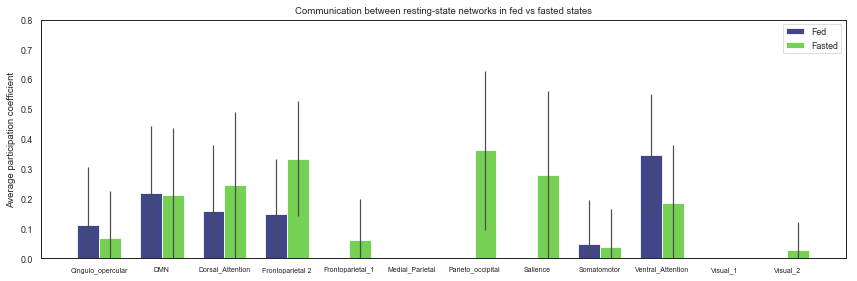

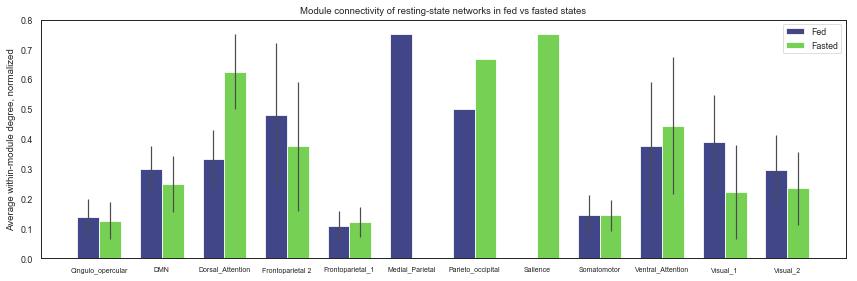

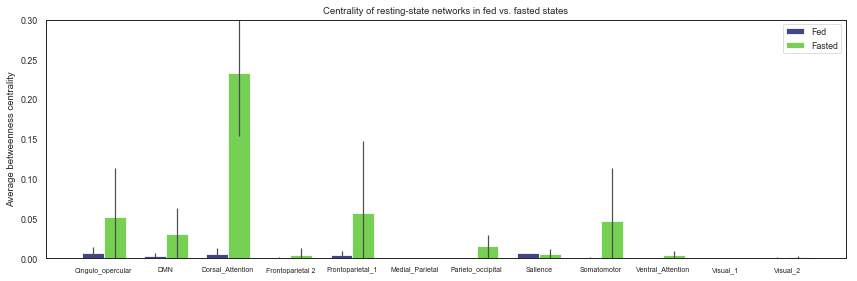

In [23]:
dGfast = results.fast.dG
dGfed = results.fed.dG


#### Participation coefficient ####
_,part_fed = get_mod(dGfed.G_,return_partition=True)
_,part_fast = get_mod(dGfast.G_,return_partition=True)

# Get node adjacency matrix
Afed = nx.to_numpy_array(dGfed.G_)
Afast = nx.to_numpy_array(dGfast.G_)

# Return a number corresponding to an RSN community
Cfed = [np.where(majorRSNs == part_fed[node]) for node in dGfed.G_.nodes()] 
Cfast = [np.where(majorRSNs == part_fast[node]) for node in dGfast.G_.nodes()]  

p_fed = calc_particip(dGfed.G_,part_fed,Afed,Cfed)
p_fast = calc_particip(dGfast.G_,part_fast,Afast,Cfast)

plot_network_measure(
    p_fed,p_fast,
    'Average participation coefficient',
    'Communication between resting-state networks in fed vs fasted states',
    0.8
)


#### Within-module degree ####
_,part_fed = get_mod(dGfed.G_,return_partition=True)
_,part_fast = get_mod(dGfast.G_,return_partition=True)

inmod_fed = within_module_degree(dGfed.G_, part_fed,normalize=True)
inmod_fast = within_module_degree(dGfast.G_, part_fast,normalize=True)

plot_network_measure(
    inmod_fed,inmod_fast,
    'Average within-module degree, normalized',
    'Module connectivity of resting-state networks in fed vs fasted states',
    0.8
    )


#### Betweenness centrality ####
_,part_fed = get_mod(dGfed.G_,return_partition=True)
_,part_fast = get_mod(dGfast.G_,return_partition=True)

btw_fed = betweenness(dGfed.G_,part_fed)
btw_fast = betweenness(dGfast.G_,part_fast)

plot_network_measure(
    btw_fed, btw_fast,
    'Average betweenness centrality',
    'Centrality of resting-state networks in fed vs. fasted states',
    0.3
    )

### Compare ROI x ROI Adjacency of $fasted$ vs. $fed$ states ###


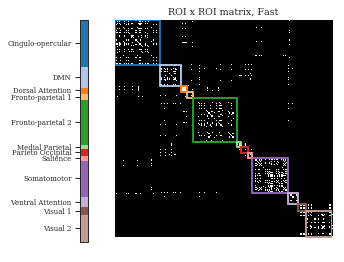

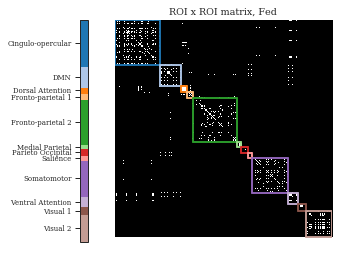

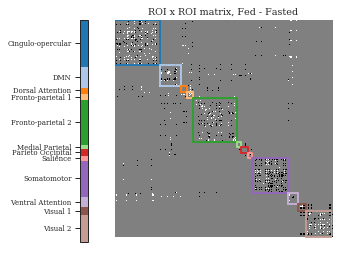

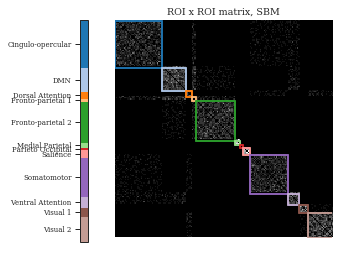

In [60]:
plot_network_adj(dGfast.tcm_,'ROI x ROI matrix, Fast',add_cbar=True)
plot_network_adj(dGfed.tcm_,'ROI x ROI matrix, Fed',add_cbar=True)
plot_network_adj(dGfed.tcm_ - dGfast.tcm_, 'ROI x ROI matrix, Fed - Fasted', add_cbar=True)

### Sample the Null Stochastic Block Model ###

In [66]:
SBM = nullSBM()
SBM.configure([combined], **config)
SBM.run()

Processing session 1 out of 1...
KeplerMapper()
Mapping on data shaped (554, 4905) using lens shaped (554, 2)

Creating 400 hypercubes.

Created 365 edges and 172 nodes in 0:00:00.470143.


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


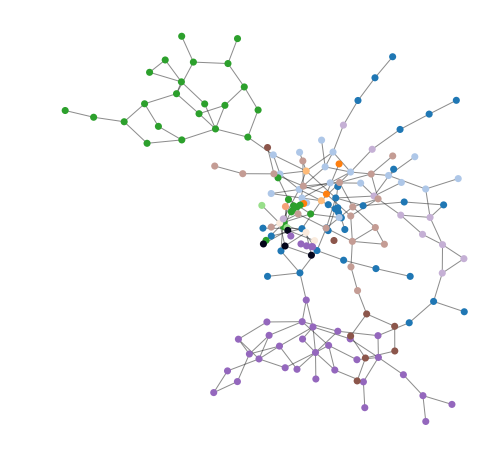

In [67]:
SBM.draw()

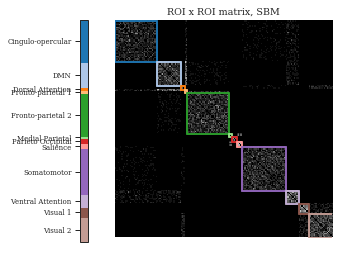

In [68]:
SBM.plot()

## $MAPPER$ analysis of $fasted$ vs. $fed$ state across individual sessions ##


In [38]:
# List of dictionaries for each session each keyed by RSN, and values are lists with a value for every node
btw_fed = []
btw_fast = []
btw_null = []
wmod_fed = []
wmod_fast = []
wmod_null = []
Qfed = []
Qfast = []
Qnull = []
p_fed = []
p_fast = []
p_null = []

# List of matrices
Afed = []
Afast = []
Anull = []

# loop over sessions
for sess_num,session in enumerate(sessions):
    
    # get day
    day = int(session.meta['day_of_week'][0])    
    if day not in [2, 4]:
        continue
    group = {2:'fast', 4:'fed'}.get(day)
    print('Processing session %d (%s)...' % (sess_num+1, group))
    
    # Zscore data
    Xz = scipy.stats.zscore(session.X,axis=0)
    
    # Run Mapper/DyNeuSR
    result = run_mapper(Xz.T, y=df_roi_rsn, **config)
    result['dG'].visualize(path_html='results/%s%d_spatial.html'%(group, sess_num+1),show=False,port=8000)
    G = result['dG'].G_
    
    # Network analysis
    Q,part = get_mod(G,return_partition=True)
    actualA = nx.to_numpy_array(G)
    C = [np.where(majorRSNs == part[node]) for node in G.nodes()] # RSN community labels

    if group == 'fast':
        btw_fast.append(betweenness(G,part))
        wmod_fast.append(within_module_degree(G,part,normalize=True))
        Qfast.append(Q)
        Afast.append(result['dG'].tcm_)
        p_fast.append(calc_particip(G,part,actualA,C))
    elif group == 'fed': 
        btw_fed.append(betweenness(G,part))
        wmod_fed.append(within_module_degree(G,part,normalize=True))
        Qfed.append(Q)
        Afed.append(result['dG'].tcm_)
        p_fed.append(calc_particip(G,part,actualA,C))
    
    # Run SBM
    sbm = nullSBM()
    sbm.set_params(result['dG'].G_.copy())
    sbm.run(num_itera=1)
    
    # Null model analysis 
    btw_null.append(betweenness(sbm.G_,sbm.partition))
    wmod_null.append(within_module_degree(sbm.G_,sbm.partition,normalize=True))
    Qnull.append(community.modularity(sbm.partition,sbm.G_))
    Anull.append(sbm.A)
    p_null.append(calc_particip(sbm.G_,sbm.partition,sbm.A,list(sbm.partition.values())))

Processing session 1 (fed)...
KeplerMapper()
Mapping on data shaped (554, 518) using lens shaped (554, 2)

Creating 400 hypercubes.

Created 253 edges and 145 nodes in 0:00:00.283493.


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


Already serving localhost:8000 
[Force Graph] http://localhost:8000/results/fed1_spatial.html
Processing session 3 (fast)...


/Users/calebgeniesse/src/miniconda3/lib/python3.6/site-packages/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


KeplerMapper()
Mapping on data shaped (554, 518) using lens shaped (554, 2)

Creating 400 hypercubes.

Created 311 edges and 164 nodes in 0:00:00.244769.


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


Already serving localhost:8000 
[Force Graph] http://localhost:8000/results/fast3_spatial.html
Processing session 4 (fed)...


/Users/calebgeniesse/src/miniconda3/lib/python3.6/site-packages/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


KeplerMapper()
Mapping on data shaped (554, 518) using lens shaped (554, 2)

Creating 400 hypercubes.

Created 302 edges and 156 nodes in 0:00:00.271329.


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


Already serving localhost:8000 
[Force Graph] http://localhost:8000/results/fed4_spatial.html
Processing session 6 (fast)...


/Users/calebgeniesse/src/miniconda3/lib/python3.6/site-packages/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


KeplerMapper()
Mapping on data shaped (554, 518) using lens shaped (554, 2)

Creating 400 hypercubes.

Created 303 edges and 158 nodes in 0:00:00.263620.


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


Already serving localhost:8000 
[Force Graph] http://localhost:8000/results/fast6_spatial.html
Processing session 7 (fed)...


/Users/calebgeniesse/src/miniconda3/lib/python3.6/site-packages/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


KeplerMapper()
Mapping on data shaped (554, 518) using lens shaped (554, 2)

Creating 400 hypercubes.

Created 288 edges and 155 nodes in 0:00:00.341623.


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


Already serving localhost:8000 
[Force Graph] http://localhost:8000/results/fed7_spatial.html
Processing session 9 (fast)...


/Users/calebgeniesse/src/miniconda3/lib/python3.6/site-packages/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


KeplerMapper()
Mapping on data shaped (554, 518) using lens shaped (554, 2)

Creating 400 hypercubes.

Created 264 edges and 147 nodes in 0:00:00.290161.


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


Already serving localhost:8000 
[Force Graph] http://localhost:8000/results/fast9_spatial.html
Processing session 10 (fed)...


/Users/calebgeniesse/src/miniconda3/lib/python3.6/site-packages/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


KeplerMapper()
Mapping on data shaped (554, 518) using lens shaped (554, 2)

Creating 400 hypercubes.

Created 376 edges and 180 nodes in 0:00:00.266037.


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


Already serving localhost:8000 
[Force Graph] http://localhost:8000/results/fed10_spatial.html


/Users/calebgeniesse/src/miniconda3/lib/python3.6/site-packages/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


### Comparing ROI x ROI Adjacency to average Functional Connectivity ###

Here, we visualize the __ROI x ROI adjacency matrix (RAM)__, where each row or column is a subject-specific parcellated brain region. The matrix was averaged across scans: 40 for fasted, 40 for fed, and all 84 for SBM. Comparing these to the average correlation matrix of the ROI timeseries across all scans shows that Mapper captures these relationships.

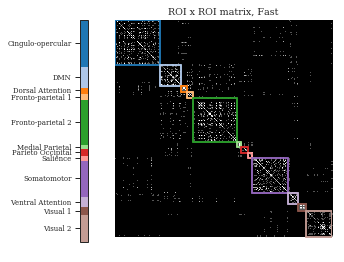

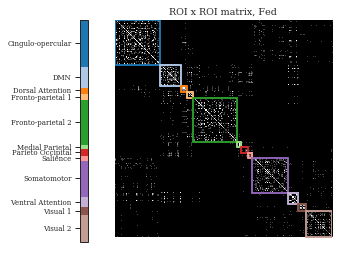

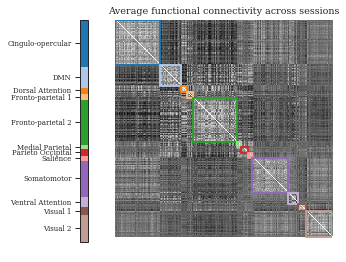

<Figure size 432x288 with 0 Axes>

In [40]:
# Fast
Afast_mean = np.mean(Afast,axis=0)
plot_network_adj(Afast_mean, 'ROI x ROI matrix, Fast')
plt.savefig('figures/fast_ram.jpg',dpi=300)

# Fed
Afed_mean = np.mean(Afed,axis=0)
plot_network_adj(Afed_mean,'ROI x ROI matrix, Fed')
plt.savefig('figures/fed_ram.jpg',dpi=300)

# SBM
SBM.plot()
plt.savefig('figures/fast_sbm.jpg',dpi=300)

# Average FC
fc = [np.corrcoef(session.X.T) for session in sessions]
fcmean = np.mean(fc,axis=0)
plot_network_adj(fcmean,'Average functional connectivity across sessions')
plt.savefig('figures/fc_ram.jpg',dpi=300)

### Modularity of resting state networks across sessions ###

Comparison of __graph modularity__ by using RSN labels as community assignments. __Real brain graphs exhibit a higher modularity than the random graph model__, but the fed and fasted states show similar modularity.

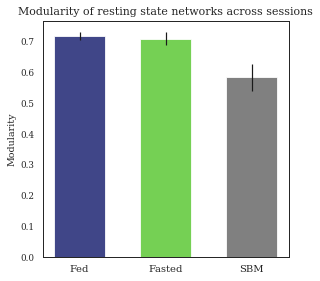

In [71]:
Qfed_mean = np.mean(Qfed)
Qfed_std = np.std(Qfed)
Qfast_mean = np.mean(Qfast)
Qfast_std = np.std(Qfast)
Qnull_mean = np.mean(Qnull)
Qnull_std = np.std(Qnull)

barlabels = ['Fed','Fasted','SBM']
barh = [Qfed_mean,Qfast_mean,Qnull_mean]
barerr = [Qfed_std,Qfast_std,Qnull_std]
bar_width = 0.15
cmap = plt.cm.get_cmap('viridis', 20)
colors = cmap(np.linspace(0,1,10))

plt.close('all')
plt.figure(figsize=(4.5,4))
plt.bar([0.25,0.50,0.75],barh,bar_width,yerr=barerr,color=[colors[2],colors[7],'gray'])
plt.xticks([0.25,0.50,0.75], barlabels, fontsize=10)
plt.ylabel('Modularity')
plt.title('Modularity of resting state networks across sessions', fontsize=11)
fig = plt.gcf()
fig.tight_layout()
plt.savefig('figures/mod.jpg',dpi=300)
plt.show()

### Participation coefficient of resting state networks across sessions ###

Comparison of __participation coefficient__ among the three types of graphs. Values were averaged across all nodes within an RSN within a scan, and then averaged across all scans.

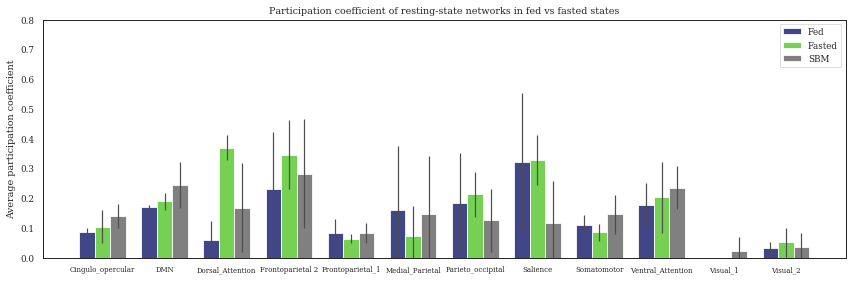

<Figure size 432x288 with 0 Axes>

In [73]:
rsnstats_fed = collections.defaultdict(list)
for session in p_fed:
    for rsn in session:
        rsnstats_fed[rsn].append(np.mean(session[rsn]))
        
rsnstats_fast = collections.defaultdict(list)
for session in p_fast:
    for rsn in session:
        rsnstats_fast[rsn].append(np.mean(session[rsn]))
        
rsnstats_null = collections.defaultdict(list)
for session in p_null:
    for rsn in session:
        rsnstats_null[rsn].append(np.mean(session[rsn]))
        
plot_network_measure(rsnstats_fed,rsnstats_fast,
                     'Average participation coefficient',
                     'Participation coefficient of resting-state networks in fed vs fasted states',
                     0.8,
                     null_measure=rsnstats_null
                    )
plt.savefig('figures/particip.jpg',dpi=300)

### Within-module connectivity of resting state networks across sessions ###

Comparison of __within-module connectivity__ among the three types of graphs. Values were averaged across all nodes within an RSN within a scan, and then averaged across all scans. Within module degree was normalized by community size to remove the possibility that larger communities had a higher chance of created edges within itself.

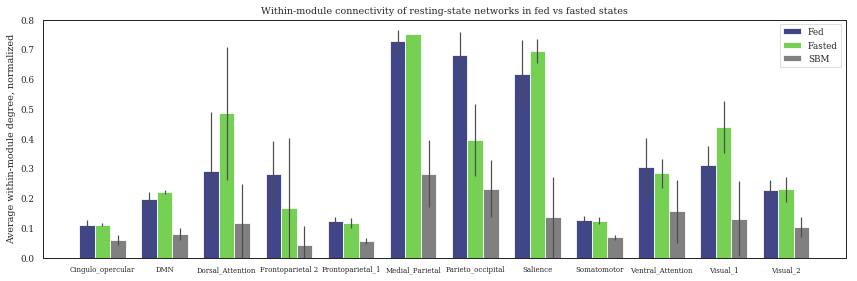

<Figure size 432x288 with 0 Axes>

In [74]:
rsnstats_fed = collections.defaultdict(list)
for session in wmod_fed:
    for rsn in session:
        rsnstats_fed[rsn].append(np.mean(session[rsn]))

rsnstats_fast = collections.defaultdict(list)
for session in wmod_fast:
    for rsn in session:
        rsnstats_fast[rsn].append(np.mean(session[rsn]))
        
rsnstats_null = collections.defaultdict(list)
for session in wmod_null:
    for rsn in session:
        rsnstats_null[rsn].append(np.mean(session[rsn]))
        
plot_network_measure(rsnstats_fed,rsnstats_fast,
                     'Average within-module degree, normalized',
                     'Within-module connectivity of resting-state networks in fed vs fasted states',
                     0.8,
                     null_measure=rsnstats_null
                    )
plt.savefig('figures/wmod.jpg',dpi=300)

### Betweenness centrality of resting state networks across sessions ###

Comparison of __betweenness centrality__ among the three types of graphs. Values were averaged across all nodes within an RSN within a scan, and then averaged across all scans. 

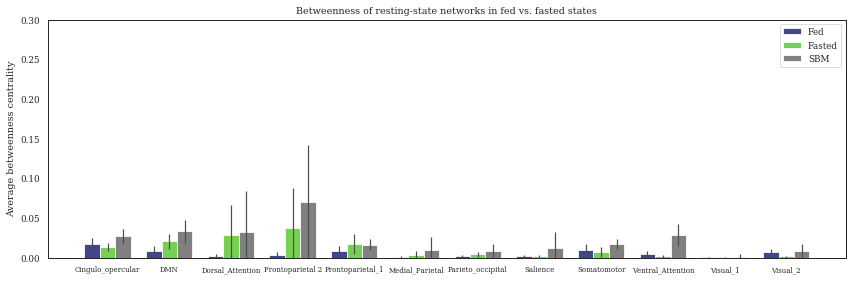

<Figure size 432x288 with 0 Axes>

In [75]:
rsnstats_fed = collections.defaultdict(list)
for session in btw_fed:
    for rsn in session:
        rsnstats_fed[rsn].append(np.mean(session[rsn]))
        
rsnstats_fast = collections.defaultdict(list)
for session in btw_fast:
    for rsn in session:
        rsnstats_fast[rsn].append(np.mean(session[rsn]))
        
rsnstats_null = collections.defaultdict(list)
for session in btw_null:
    for rsn in session:
        rsnstats_null[rsn].append(np.mean(session[rsn]))
        
plot_network_measure(rsnstats_fed,rsnstats_fast,
                     'Average betweenness centrality',
                     'Betweenness of resting-state networks in fed vs. fasted states',
                     0.3,
                     null_measure=rsnstats_null
                    )
plt.savefig('figures/btw.jpg',dpi=300)

# Discussion #

 - Fasted state exhibits __increased participation coefficient__ across almost all resting state networks compared to fed state


 - Both real brain graphs showed __higher participation, within-module connectivity,__ and __modularity__ across all resting state networks compared to the null model


 - Greater structure within a network vs. null model



## Conclusions ##

 - Mapper graphs capture brain’s ability to optimize the balance between integration and segregation of function


 - The results from this study show that Mapper  can  reveal  important  anatomical  and  functional  architecture  of  the human brain


 - Running Mapper in anatomical space can be used to highlight physiologically relevant anatomical regions of interest to guide further analysis


# Contributions #

R.A. and C.G. designed the experiments. C.G. collected and cleaned the data. R.A. and C.G. developed and implemented preprocessing and analysis methods. R.A. and C.G. performed and interpreted analyses. R.A. drafted a manuscript (for CS 224W) and C.G. combined relevent parts of this writeup with analysis code and results into a final computational notebook. 

# Acknowledgments #

Funding was provided by a Graduate Research Fellowship (NIH-GRF) from the National Science Foundation (NSF) to R.A., and a Biophysics Training Grant (GM008294) from the National Institute of Health (NIH) to C.G.

# References #

**1** Glomb, 2017 <br>
**2** Hansen, 2015 <br>
**3** Deco, 2013 <br>
**4** Greicius, 2008<br>
**5** Poldrack, 2015<br>
**6** Saggar, 2018<br>
**7** Esteban, 2018<br>
**8** Singh, 2007<br>
**9** VanderMaaten, 2008<br>
**10** McInnes, 2017<br>
**11** Abbe, 2017<br>
